In [1]:
#Importer les packages
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
#Le chargement de la base de données
(X_train, Y_train), (X_test, Y_test)= cifar10.load_data()

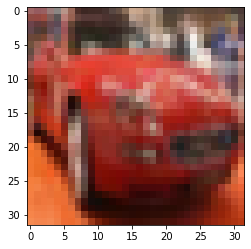

In [3]:
plt.imshow(X_train[5])

In [4]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

In [5]:
#Normalisation
X_train=X_train/255.0
X_test=X_test/255.0

In [6]:
X_train[9]

array([[[0.49019608, 0.49019608, 0.45490196],
        [0.43137255, 0.39607843, 0.35686275],
        [0.4       , 0.35294118, 0.3254902 ],
        ...,
        [0.79215686, 0.81176471, 0.83921569],
        [0.78431373, 0.80392157, 0.83137255],
        [0.79215686, 0.81568627, 0.83921569]],

       [[0.55686275, 0.57254902, 0.55686275],
        [0.57254902, 0.56470588, 0.54509804],
        [0.69019608, 0.6745098 , 0.66666667],
        ...,
        [0.76470588, 0.78823529, 0.80392157],
        [0.77647059, 0.80392157, 0.81960784],
        [0.8       , 0.82745098, 0.84313725]],

       [[0.70588235, 0.7254902 , 0.71764706],
        [0.56078431, 0.57254902, 0.57254902],
        [0.61176471, 0.61568627, 0.61568627],
        ...,
        [0.47843137, 0.43529412, 0.44313725],
        [0.54509804, 0.50196078, 0.51372549],
        [0.61960784, 0.57647059, 0.58823529]],

       ...,

       [[0.40784314, 0.32156863, 0.16078431],
        [0.39607843, 0.31372549, 0.15294118],
        [0.39607843, 0

In [7]:
#Créer mon modéle 
model=Sequential()

In [8]:
#Créer le réseau de convolution (CNN)
model.add(Conv2D(256,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
#Ajouter une autre couche de convolution
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Flatten())

In [11]:
#Le complétement connecté 
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
activation (Activation)      (None, 30, 30, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [13]:
#Entrainer le model
model.fit(X_train,Y_train, batch_size=32,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 426s 273ms/step - loss: 1.4033 - sparse_categorical_accuracy: 0.4993
Epoch 2/10
1563/1563 [==============================] - 439s 281ms/step - loss: 1.0578 - sparse_categorical_accuracy: 0.6330
Epoch 3/10
1563/1563 [==============================] - 437s 280ms/step - loss: 0.9221 - sparse_categorical_accuracy: 0.6806
Epoch 4/10
1563/1563 [==============================] - 435s 278ms/step - loss: 0.8395 - sparse_categorical_accuracy: 0.7094
Epoch 5/10
1563/1563 [==============================] - 449s 288ms/step - loss: 0.7776 - sparse_categorical_accuracy: 0.7326
Epoch 6/10
1563/1563 [==============================] - 1657s 1s/step - loss: 0.7265 - sparse_categorical_accuracy: 0.7464
Epoch 7/10
1563/1563 [==============================] - 439s 281ms/step - loss: 0.6852 - sparse_categorical_accuracy: 0.7625
Epoch 8/10
1563/1563 [==============================] - 471s 301ms/step - loss: 0.6524 - sparse_categorical_accuracy: 0.7713
Ep

In [14]:
test_loos,test_accuracy=model.evaluate(X_test,Y_test)

313/313 [==============================] - 22s 70ms/step - loss: 0.9528 - sparse_categorical_accuracy: 0.6950
